In [1]:
import sys
import streamlit as st
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



print(f"Python version -- {sys.version}")
print()

Python version -- 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]



In [2]:
def load_data():
    # Get the directory where the current script is located
    script_dir = os.getcwd()
    # Construct path to the CSV file relative to the script location
    file_path = os.path.join(
        os.path.dirname(script_dir), "data", "raw", "medical_insurance.csv"
    )
    return pd.read_csv(file_path)

df = load_data()
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

Review object columns

In [4]:
object_cols = df.select_dtypes(include=["object"]).columns

for col in object_cols:
    print(col, ":\t ", df[col].unique())

sex :	  ['Female' 'Male' 'Other']
region :	  ['North' 'Central' 'West' 'South' 'East']
urban_rural :	  ['Suburban' 'Urban' 'Rural']
education :	  ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors']
marital_status :	  ['Married' 'Single' 'Divorced' 'Widowed']
employment_status :	  ['Retired' 'Employed' 'Self-employed' 'Unemployed']
smoker :	  ['Never' 'Current' 'Former']
alcohol_freq :	  [nan 'Weekly' 'Daily' 'Occasional']
plan_type :	  ['PPO' 'POS' 'HMO' 'EPO']
network_tier :	  ['Bronze' 'Gold' 'Platinum' 'Silver']


It is generally better, when possible, to represent these columns with meaningful numeric values. This approach works for the alcohol and smoking fields, since it is reasonable to assign values based on how often these behaviors occur. While the specific numbers are somewhat subjective, they align with standard medical guidance. The limitation, however, is that the dataset only records frequency of use, not the actual amount consumed. Further, education also has a clear linear relationship and will convert levels of education to numeric values.

In [5]:
df["alcohol_freq"] = df["alcohol_freq"].replace(
    {"nan": 0, "Weekly": 7, "Daily": 30, "Occasional": 2}
)

df["smoker"] = (
    df["smoker"].replace({"Never": 0, "Current": 30, "Former": 7})
    .astype("int64")
)
df["education"] = (
    df["education"].replace({
        "No HS": 0,
        "HS": 1,
        "Some College": 2,
        "Bachelors": 3,
        "Masters": 4,
        "Doctorate": 5
    })
    .astype("int64")
)

# Can now adopt these as numeric columns
#numeric_cols = (df.select_dtypes(include=["float64", "int64"])).columns

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_52976\2923935827.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["alcohol_freq"] = df["alcohol_freq"].replace(
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_52976\2923935827.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"].replace({"Never": 0, "Current": 30, "Former": 7})
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_52976\2923935827.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  int64  
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  int64  
 13  

In [7]:
temp_data = df[numeric_cols].corr()["annual_medical_cost"].sort_values()
plt.figure(figsize=(8, 10))
temp_data[:-1].plot.barh(
    title="Correlation of all numeric features with Annual Medical Cost"
)

NameError: name 'numeric_cols' is not defined

In [ ]:
df1 = df.copy()
print("Before:", len(df1))
df1 = df1.drop_duplicates()
print("After:", len(df1))

del df1

Before: 100000
After: 100000


In [ ]:
# 1 Demographics
demographics_cols = [
    "age",
    "sex",
    "region",
    "urban_rural",
    "income",
    "education",
    "marital_status",
    "employment_status",
    "household_size",
    "dependents",
]
df_demographics = df[demographics_cols]

# 2 Health and Conditions
health_cols = [
    "bmi",
    "smoker",
    "alcohol_freq",
    "chronic_count",
    "hypertension",
    "diabetes",
    "asthma",
    "copd",
    "cardiovascular_disease",
    "cancer_history",
    "kidney_disease",
    "liver_disease",
    "arthritis",
    "mental_health",
    "systolic_bp",
    "diastolic_bp",
    "ldl",
    "hba1c",
]
df_health = df[health_cols]

# 3 Healthcare and Claims
claims_cols = [
    "visits_last_year",
    "had_major_procedure",
    "hospitalizations_last_3yrs",
    "days_hospitalized_last_3yrs",
    "medication_count",
    "proc_imaging_count",
    "proc_surgery_count",
    "proc_physio_count",
    "proc_consult_count",
    "proc_lab_count",
]
df_claims = df[claims_cols]

# 4 Clinical Metrics and Risk Indicators
risk_cols = [
    "claims_count",
    "avg_claim_amount",
    "total_claims_paid",
    "risk_score",
    "is_high_risk",
]
df_risk = df[risk_cols]

# 5 Insurance and Plan Information
insurance_cols = [
    "plan_type",
    "network_tier",
    "deductible",
    "copay",
    "policy_term_years",
    "policy_changes_last_2yrs",
    "provider_quality",
    "annual_medical_cost",
    "annual_premium",
    "monthly_premium",
]
df_insurance = df[insurance_cols]

In [ ]:
df_insurance
df_risk
df_claims
df_health
df_demographics

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents
0,52,Female,North,Suburban,22700.0,5,Married,Retired,3,1
1,79,Female,North,Urban,12800.0,0,Married,Employed,3,1
2,68,Male,North,Rural,40700.0,1,Married,Retired,5,3
3,15,Male,North,Suburban,15600.0,2,Married,Self-employed,5,3
4,53,Male,Central,Suburban,89600.0,5,Married,Self-employed,2,0
...,...,...,...,...,...,...,...,...,...,...
99995,50,Male,West,Urban,127200.0,0,Married,Employed,2,0
99996,42,Male,East,Suburban,21600.0,1,Married,Employed,2,0
99997,41,Male,West,Rural,81900.0,1,Divorced,Unemployed,1,0
99998,51,Female,South,Urban,43400.0,5,Single,Unemployed,3,2


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_insurance.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Insurance Features")
plt.show()

ValueError: could not convert string to float: 'PPO'

<Figure size 1000x600 with 0 Axes>

In [15]:
corr_df = pd.read_csv("../data/processed/correlation_table.csv")

corr_df

,person_id,age,income,education,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,1.000000,0.000160,0.002109,0.001050,-0.004329,-0.004821,-0.000179,0.002576,-0.003281,0.004654,...,0.000887,0.005058,0.003586,0.000142,-0.002311,0.003699,-0.005479,-0.004591,0.000506,-0.003714
1,0.000160,1.000000,0.005382,0.002409,0.000895,-0.000482,0.001980,-0.007391,0.003512,0.062841,...,0.020012,0.057657,0.060043,0.022792,0.035918,0.017710,0.023093,0.025933,0.559152,0.020959
2,0.002109,0.005382,1.000000,0.003665,-0.004950,-0.002082,-0.002565,0.000163,0.000770,0.000578,...,-0.004682,0.002356,0.002534,0.000722,0.004332,-0.002687,-0.002585,0.004125,0.005059,0.000129
3,0.001050,0.002409,0.003665,1.000000,0.004619,0.002993,-0.000578,-0.001785,-0.005761,-0.000943,...,-0.001970,0.002491,0.001491,0.002536,-0.003920,-0.000302,-0.002006,-0.003920,-0.004486,-0.004618
4,-0.004329,0.000895,-0.004950,0.004619,1.000000,0.885795,-0.006505,0.005508,-0.001777,0.000148,...,-0.001113,0.002362,0.001334,0.001829,0.000161,0.001188,0.009812,-0.000928,0.003743,-0.001446
5,-0.004821,-0.000482,-0.002082,0.002993,0.885795,1.000000,-0.004811,0.003406,-0.005749,0.000816,...,0.000008,0.001782,0.001141,0.002128,-0.000417,0.001594,0.008051,-0.000002,0.001018,-0.000547
6,-0.000179,0.001980,-0.002565,-0.000578,-0.006505,-0.004811,1.000000,-0.008526,0.002266,0.002865,...,-0.002702,0.005780,-0.002216,0.003762,0.000835,0.004554,0.001357,-0.002118,0.085079,0.000142
7,0.002576,-0.007391,0.000163,-0.001785,0.005508,0.003406,-0.008526,1.000000,-0.000760,0.003130,...,0.000241,-0.002437,0.006607,0.005138,-0.003507,0.004368,0.000201,0.005011,0.264652,-0.003508
8,-0.003281,0.003512,0.000770,-0.005761,-0.001777,-0.005749,0.002266,-0.000760,1.000000,0.001836,...,0.000915,0.004544,-0.001678,-0.000749,0.000329,-0.000475,-0.006187,0.001910,0.001841,-0.000519
9,0.004654,0.062841,0.000578,-0.000943,0.000148,0.000816,0.002865,0.003130,0.001836,1.000000,...,0.073792,0.185574,0.202380,0.078514,0.123087,0.072141,0.070747,0.077500,0.265066,0.080897


In [ ]:
if "alcohol_freq" in corr_df.columns:
    print(True)

In [ ]:
for i in df.columns:
    if i not in corr_df.columns:
        print(i)


person_id
sex
region
urban_rural
marital_status
employment_status
alcohol_freq
plan_type
network_tier


In [ ]:
x = pd.read_csv(
    "../data/processed/cleaned_customers.csv", index_col=0
)
x.info()
x["alcohol_freq"].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 75722 to 15796
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  object 
 2   region                       100000 non-null  object 
 3   urban_rural                  100000 non-null  object 
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  int64  
 6   marital_status               100000 non-null  object 
 7   employment_status            100000 non-null  object 
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  int64  
 12  alcohol_freq                 100000 non-null  int64  
 13  v

array([ 0,  7, 30,  2])

In [12]:
x = pd.read_csv("../data/processed/correlation_table.csv")


SyntaxError: cannot assign to expression (3626903167.py, line 3)

In [19]:
pd.set_option("future.no_silent_downcasting", True)

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_52976\4236588593.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


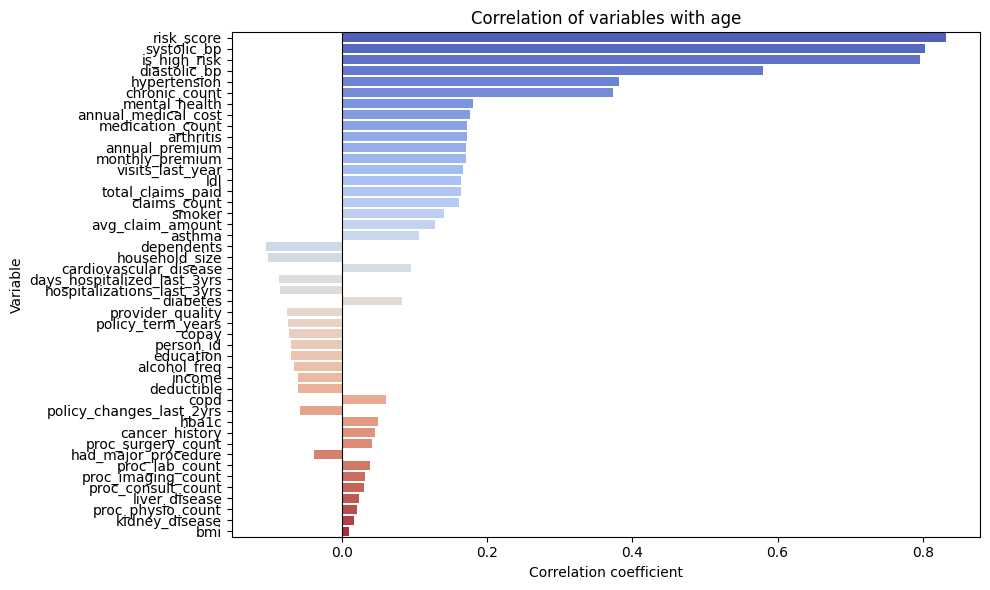

In [18]:
# Pick the target column
target_col = "age"

# Select only numeric columns (correlation works only on numeric types)
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlations with the target column
corr_with_target = numeric_df.corr()[target_col].drop(target_col)

# Sort by strength
corr_with_target = corr_with_target.sort_values(
    key=lambda x: abs(x), ascending=False
)

# Plot as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm"
)
plt.title(f"Correlation of variables with {target_col}")
plt.xlabel("Correlation coefficient")
plt.ylabel("Variable")
plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

In [ ]:
from typing import Literal
from src.utils.db_utils import get_db_connection
import os

TARGET_DB_NAME: str = "pagila"
TARGET_DB_USER: str = "de14_rope"
TARGET_DB_PASSWORD: str = ""
TARGET_DB_HOST: str = "data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com"
TARGET_DB_PORT: str = "5432"
TARGET_DB_SCHEMA: str = "all_2509"


connection_details: dict[
    Literal["dbname", "user", "password", "host", "port", "schema"], str
] = {
    "dbname": TARGET_DB_NAME,
    "user": TARGET_DB_USER,
    "password": TARGET_DB_PASSWORD,
    "host": TARGET_DB_HOST,
    "port": TARGET_DB_PORT,  
    "schema": TARGET_DB_SCHEMA,
}


from sqlalchemy import text

with get_db_connection(connection_details) as conn:
    result = conn.execute(
        text(
            """
        SELECT
            current_database(),
            current_user,
            session_user,
            current_schema(),
            inet_server_addr(),
            inet_server_port(),
            version();
    """
        )
    )
    print(result.fetchall())

2025-12-07 18:07:27,324 - src.utils.db_utils - INFO - Successfully created the database engine.
2025-12-07 18:07:28,609 - src.utils.db_utils - INFO - Successfully connected to the database.


[('pagila', 'de14_rope', 'de14_rope', 'all_2509', '172.31.0.14', 5432, 'PostgreSQL 17.6 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 12.4.0, 64-bit')]


In [13]:
import logging
import os
import pandas as pd
import timeit
from sqlalchemy.exc import SQLAlchemyError
from config.db_config import load_db_config
from src.utils.db_utils import get_db_connection
from src.utils.logging_utils import setup_logger, log_load_success
from src.utils.db_table_check import log_table_action

# Configure the logger
logger = setup_logger(__name__, "load_data_correlation.log")

TYPE = "CORRELATION table moved to database"

TARGET_SCHEMA = "all_2509"
TARGET_TABLE = "rp_capstone_load"


logger.info(f"Running load_correlation module")


def load_correlation(transformed_data: pd.DataFrame) -> None:
    """
    Load transformed correlation data.

    Args:
        transformed_data (pd.DataFrame): DataFrame containing transformed correlations.

    Raises:
        Exception: If loading fails.
    """
    if transformed_data.empty:
        logger.warning(
            "No data provided to load. Skipping database operation."
        )
        return

    try:
        # Set up performance recording for transaction load
        start_time = timeit.default_timer()
        load_correlation_exec(transformed_data)
        load_transactions_execution_time = timeit.default_timer() - start_time

        log_load_success(
            logger,
            TYPE,
            transformed_data.shape,
            load_transactions_execution_time,
        )
    except Exception as e:
        logger.error(f"Failed to load data: {e}")
        raise Exception(f"Failed to load data: {e}")


logger.info(f"Running load_correlation exec")


def load_correlation_exec(transformed_data: pd.DataFrame) -> None:
    """
    Execute the transaction load into the target database.

    Args:
        transformed_data (pd.DataFrame): DataFrame containing transformed transaction records.

    """
    # Validate table
    # Get a connection to the target database
    # Check if table exists and log action
    # Load the transformed data into the target database
    # Commit the transaction
    # Handle Exceptions
    # Clean up the connection

    connection_details = load_db_config()["target_database"]
    connection = get_db_connection(connection_details)

    # Check if table exists and log action, create utils for this
    exists = log_table_action(connection, TARGET_TABLE, TARGET_SCHEMA)

    # Load data into table
    try:
        transformed_data.to_sql(
            TARGET_TABLE,
            connection,
            schema=TARGET_SCHEMA,
            if_exists="append" if exists else "replace",
            index=False,
        )
    except Exception as e:
        logger.error(
            f"Failed to load {len(transformed_data)} rows into {TARGET_SCHEMA}.{TARGET_TABLE}: {e}"
        )
        raise Exception(f"Failed to load into database: {e}")

    connection.close()

2025-12-07 17:38:27,031 - __main__ - INFO - Running load_correlation module
2025-12-07 17:38:27,032 - __main__ - INFO - Running load_correlation exec


In [24]:
TARGET_SCHEMA = "all_2509"
TARGET_TABLE = "rp_capstone_load"
TARGET_TABLE2 = "rp_sales"
TARGET_TABLE3 = "full_join"

with get_db_connection(connection_details) as conn:
    result = conn.execute(
        text(
            """
            SELECT EXISTS (
                SELECT 1
                FROM information_schema.tables
                WHERE table_schema = :schema
                  AND table_name = :table
            );
        """
        ),
        {"schema": TARGET_SCHEMA, "table": TARGET_TABLE2},
    )
    exists = result.scalar()
    print(f"Table {TARGET_SCHEMA}.{TARGET_TABLE2} exists? {exists}")

2025-12-07 18:19:12,399 - src.utils.db_utils - INFO - Successfully created the database engine.
2025-12-07 18:19:12,825 - src.utils.db_utils - INFO - Successfully connected to the database.


Table all_2509.rp_sales exists? True


In [26]:
from sqlalchemy import text
from src.utils.db_utils import get_db_connection

TARGET_SCHEMA = "all_2509"

with get_db_connection(connection_details) as conn:
    result = conn.execute(
        text(
            """
            SELECT table_name
            FROM information_schema.tables
            WHERE table_schema = :schema
            ORDER BY table_name;
        """
        ),
        {"schema": TARGET_SCHEMA},
    )
    tables = [row[0] for row in result.fetchall()]
    print(f"Tables in schema {TARGET_SCHEMA}:")
    for t in tables:
        print(t)

2025-12-07 18:34:57,223 - src.utils.db_utils - INFO - Successfully created the database engine.
2025-12-07 18:34:58,622 - src.utils.db_utils - INFO - Successfully connected to the database.


Tables in schema all_2509:
main_table_rp
order_by_original
order_by_v3
rp_capstone_load
rp_customers_and_shipping
rp_sales
rp_sales_costs
rp_unique_products
team13_countrystats
team13_discounts
team13_mastertableview
team13_order_sorted
team13_smartphones
team13_top_performing_view
